# performance tests of new iterative solvers in eigen
## Machine: Evinf3, OMP_NUM_THREADS=16
## Model: ThermoRichardsMechanics (3D) with mass lumping, 3.1536e+07 s, iteration based time stepping, equilibration simulation

In [35]:
from os import listdir

In [36]:
import matplotlib.pyplot as plt

In [37]:
import plot_settings

In [38]:
plt.rcParams['figure.figsize'] = (18, 16)

In [39]:
allfiles = listdir(".")

In [40]:
TR_log = []
TRM_log = []
for file in allfiles:
    if "3D" in file:
        if "log" in file:
            if "_TR_" in file:
                TR_log.append(file)
            elif "_TRM_" in file:
                TRM_log.append(file)

In [41]:
TRM_log

['3D_TRM_BiCGSTAB_DIAGONAL.log',
 '3D_TRM_BiCGSTABL_DIAGONAL.log',
 '3D_TRM_IDRSTABL_DIAGONAL.log',
 '3D_TRM_PARDISO.log']

In [42]:
from ogs6py.ogs import OGS

In [43]:
m = OGS()

PROJECT_FILE not given. Calling it default.prj.


In [44]:
TRM_log

['3D_TRM_BiCGSTAB_DIAGONAL.log',
 '3D_TRM_BiCGSTABL_DIAGONAL.log',
 '3D_TRM_IDRSTABL_DIAGONAL.log',
 '3D_TRM_PARDISO.log']

In [45]:
df_TR = {}
df_TRM = {}
df_TR_iter = {}
df_TRM_iter = {}
for entry in TR_log:
    df_TR[entry] = m.parse_out(entry, filter="by_time_step")
    df_TR_iter[entry] = m.parse_out(entry, filter="time_step_vs_iterations")
for entry in TRM_log:
    df_TRM[entry] = m.parse_out(entry, filter="by_time_step")
    df_TRM_iter[entry] = m.parse_out(entry, filter="time_step_vs_iterations")

Text(0.5, 1.0, 'TRM model: linear solver time (sum) vs time step')

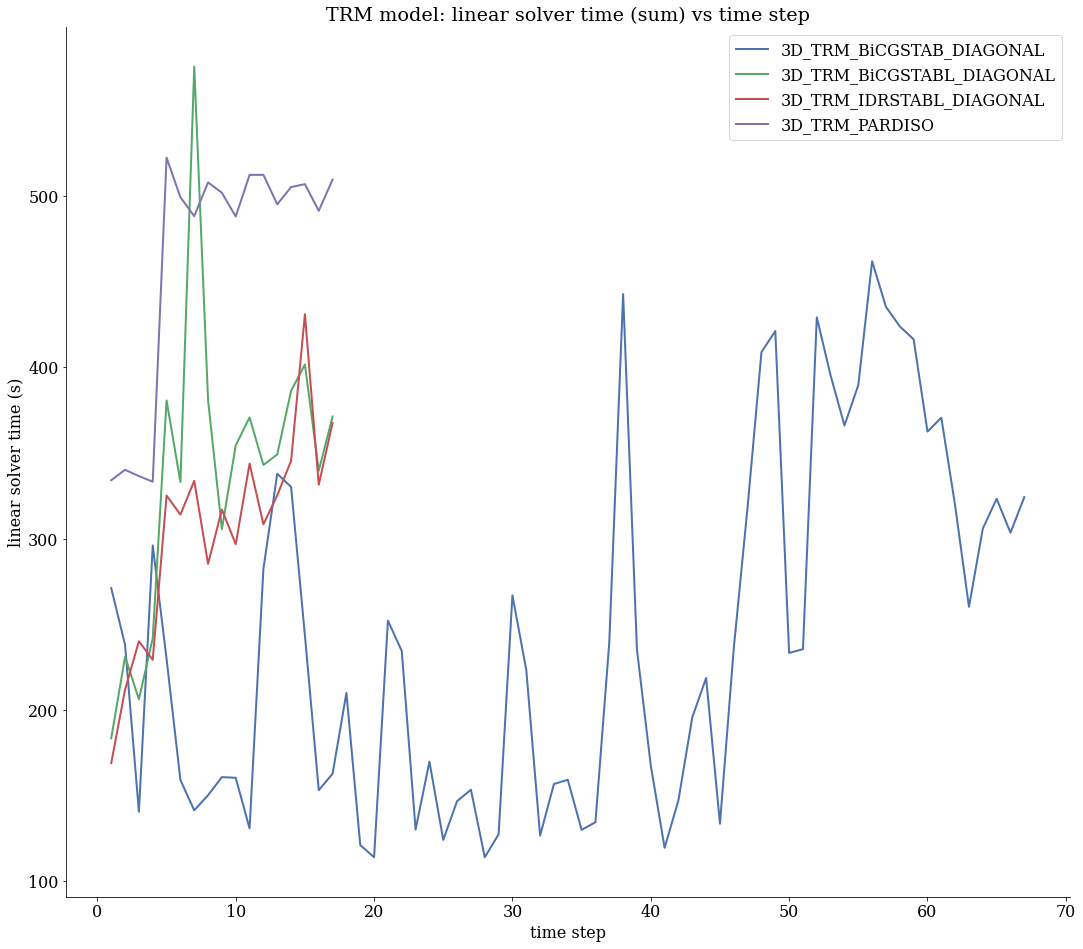

In [46]:
for entry in TRM_log:
    plt.plot(df_TRM[entry]["linear_solver_time"].droplevel("mpi_process"), label=entry.split(".")[0])
plt.legend()
plt.ylabel("linear solver time (s)")
plt.xlabel("time step")
plt.title("TRM model: linear solver time (sum) vs time step")

Text(0.5, 1.0, 'TRM model: cumulative sum of linear solver time')

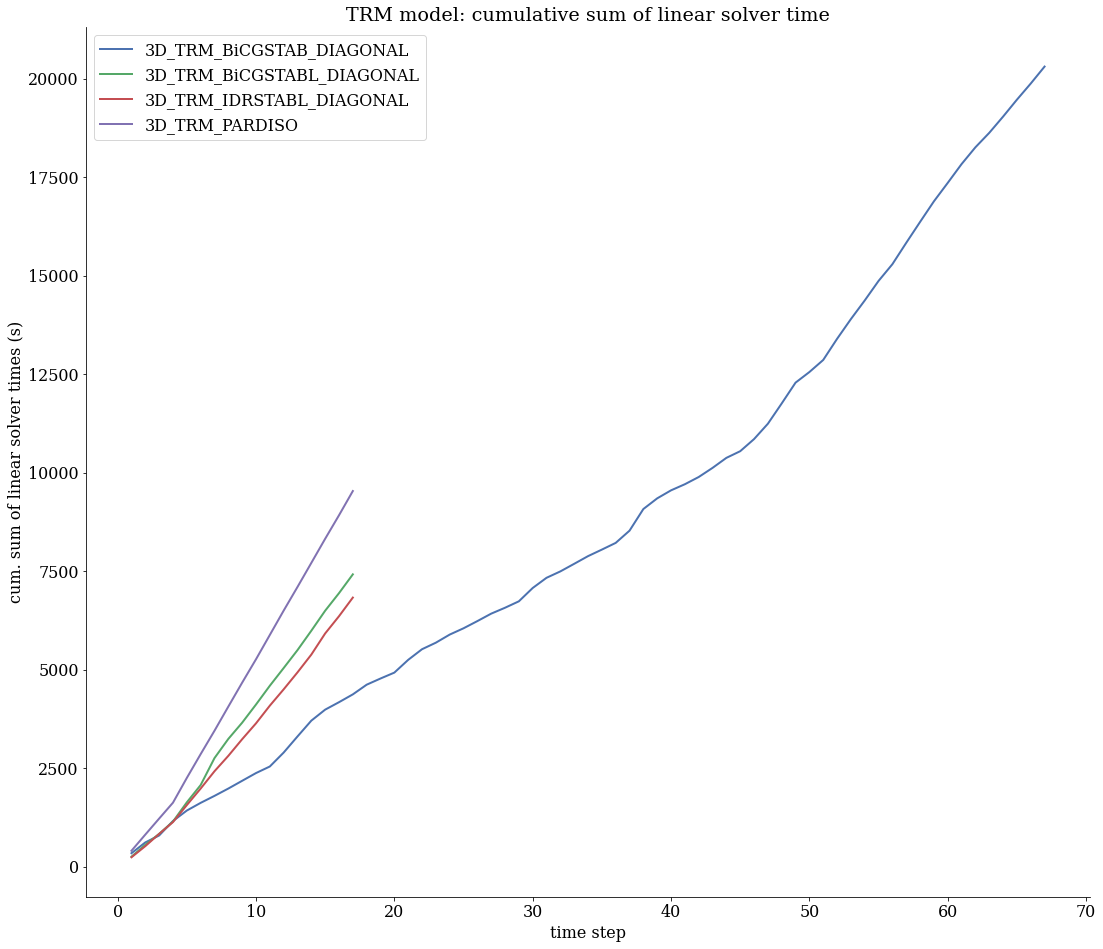

In [49]:
for entry in TRM_log:
    plt.plot(df_TRM[entry]["time_step_solution_time"].droplevel("mpi_process").cumsum(), label=entry.split(".")[0])
plt.legend()
#plt.yscale("log")
#plt.xscale("log")
plt.ylabel("cum. sum of linear solver times (s)")
plt.xlabel("time step")
plt.title("TRM model: cumulative sum of linear solver time")

Text(0.5, 1.0, 'TRM model: number of iterations per time step')

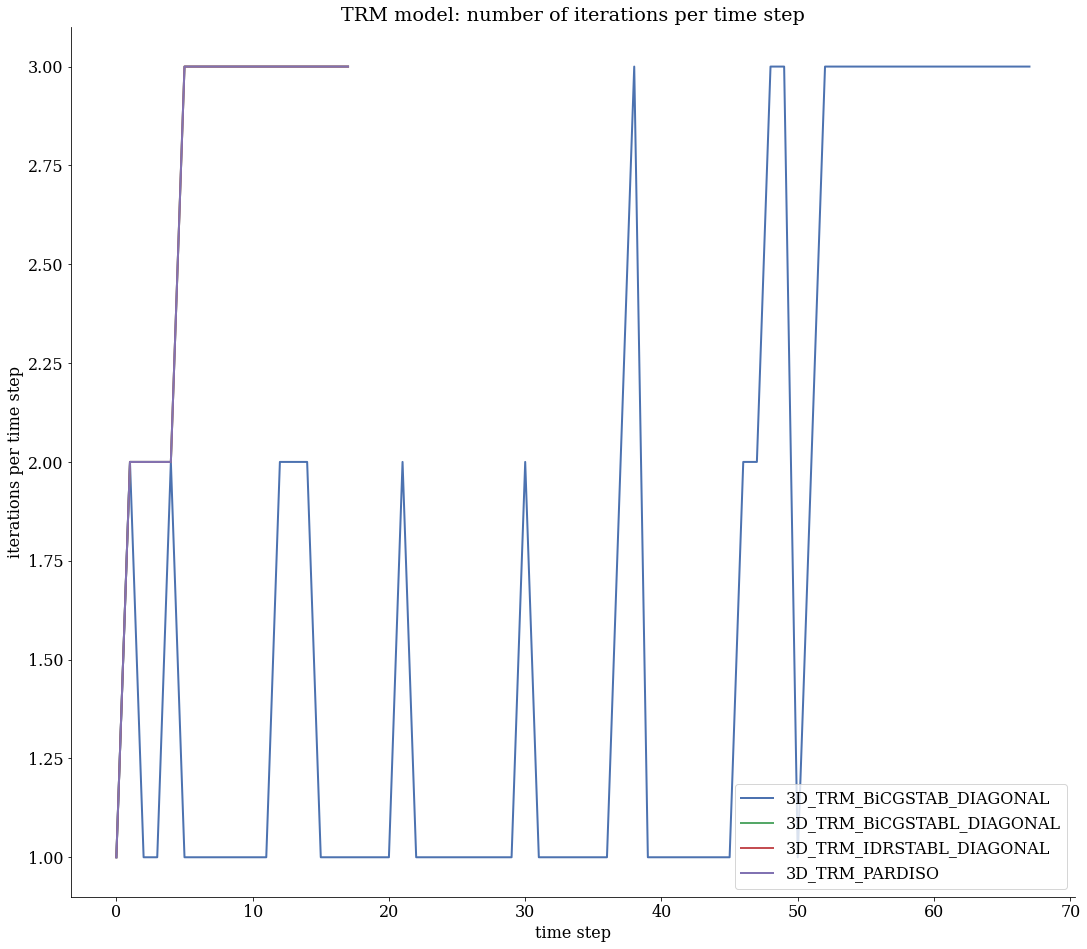

In [48]:
for entry in TRM_log:
    plt.plot(df_TRM_iter[entry]["iteration_number"], label=entry.split(".")[0])
plt.legend()
plt.ylabel("iterations per time step")
#plt.xscale('log')
plt.xlabel("time step")
plt.title("TRM model: number of iterations per time step")